# high dim to low dim

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(666)
X = np.empty(shape=(100, 2))
X[:, 0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0., 10., size = 100)

In [3]:
def demean(x):
    return x - np.mean(x)

X = demean(X)

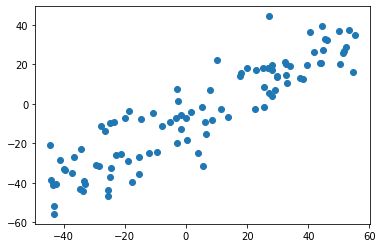

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## 基本函数

In [5]:
def f(x, w):
    return np.sum(x.dot(w) ** 2) / len(x)

def delta_f(x, w):
    return x.T.dot(x.dot(w)) * 2. / len(x)

def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(x, w, iters_n, eta):
    w = direction(w)
    while iters_n:
        grd = delta_f(x, w)
        w += eta * grd
        w = direction(w)
        
        iters_n -= 1
    return w

## 获得前N个主成分函数

In [6]:
def get_first_N_components(x, n, iters_n, eta):
    x_pca = x.copy()
    x_pca = demean(x_pca)
    res = np.empty(shape = (n, x.shape[1]))
    
    for i in range(n):
        w_init = np.ones(shape = x_pca.shape[1])
        w = gradient_ascent(x_pca, w_init, iters_n, eta)
        res[i, :] = w
        
        x_pca -= x_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [7]:
res = get_first_N_components(X, 1, 100, 0.001)
res

array([[0.77852666, 0.62761153]])

## 降维转换

In [8]:
def transform(x, w):
    return x.dot(w.T)

def inverse_transform(x, w):
    assert x.shape[1] == w.shape[0]
    
    return x.dot(w)

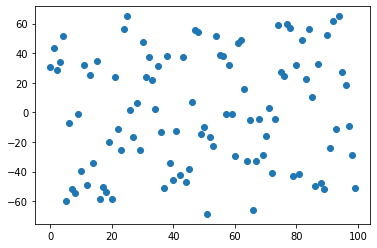

In [9]:
x_trans = transform(X, res)
# plt.scatter(x_trans[:, 0], x_trans[:, 1])
# plt.show()
x_trans.shape
plt.scatter(range(len(x_trans)),x_trans)
plt.show()

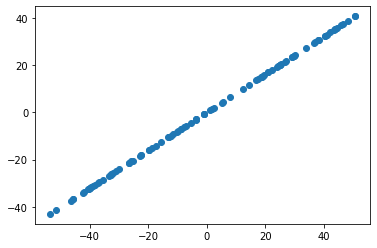

In [10]:
x_inverse_trans = inverse_transform(x_trans, res)
plt.scatter(x_inverse_trans[:, 0], x_inverse_trans[:, 1])
plt.show()